# 와인 품질 예측하기

# 문제 정의
와인의 화학 데이터를 기반으로 와인의 품질을 측정


# 가설 수립
산성도, 알콜 도수와 같은 정량적인 화학 데이터를 이용해서 미각측정단계 없이 와인의 품질을 측정하는게 가능하다


# 목표
화학 특징 데이터를 입력받아 0-10 사이의 숫자로 와인의 품질을 나타낸다.

----
# 데이터 구성

## 11개 특징 데이터
1. fixed acidity
2. volatile acidity

## 요약
개수 : 1599개 / 출력데이터 : quailty 와인품질

## 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_csv("../../COALA_DS_DATA/COALA_DS_DATA/week6/data/wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4.617195
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,4.782987
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,4.868157
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,5.929590
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4.714931
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.420490
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,5.730746
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.337004
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,4.697053


# EDA & Feature Engineering

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

facet = sns.FacetGrid(df, aspect = 4)
facet.map(sns.kdeplot, 'quality')
facet.add_legend()
plt.show()

<Figure size 1299.25x300 with 1 Axes>

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df) # 반환값 -> ndarray
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)

scaled_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-1.171479
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.978289
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.879046
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.357786
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-1.057592
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.235441
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.126084
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.832524
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-1.078424


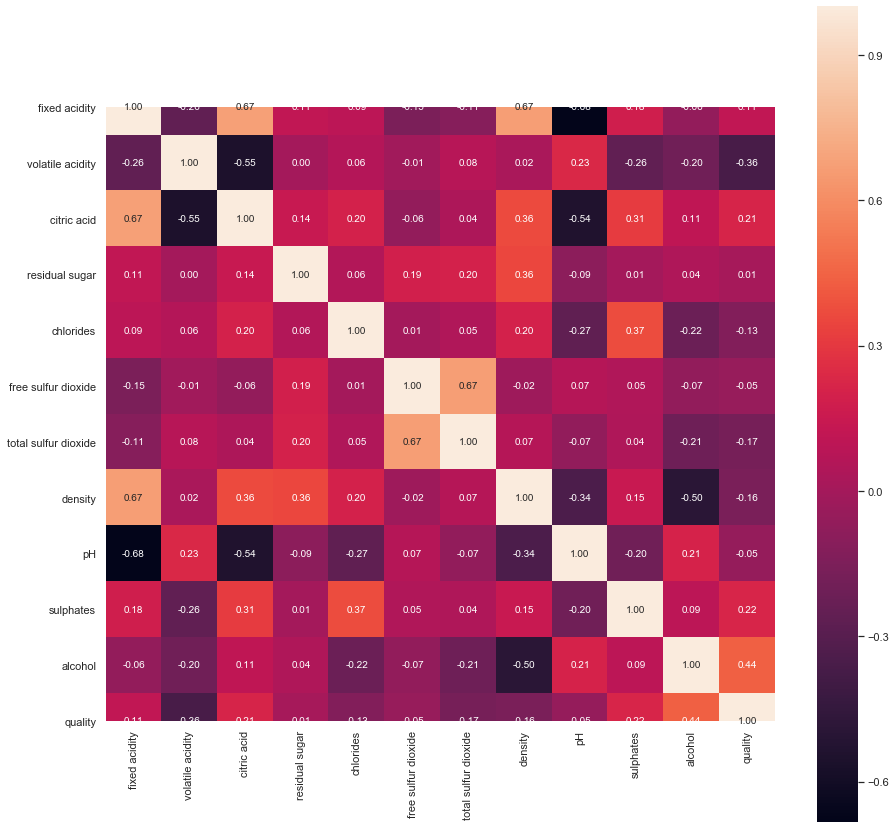

In [4]:
plt.figure(figsize = (15, 15))

sns.heatmap(scaled_data.corr(), annot = True, fmt = '.2f', square = True)
plt.show()

## Data set 구성

In [5]:
train_data = scaled_data.drop('quality', axis = 1)
target_data = scaled_data['quality']
train_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2)
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
711,0.333436,0.207702,0.354443,0.327207,0.117607,0.011961,1.992767,1.618302,0.446337,-0.284141,-0.866379
1554,-0.987984,1.827781,-1.288771,-0.098479,-0.541259,-0.083669,-0.713631,-0.252646,1.483021,-0.343154,0.541630
1272,-1.390155,-0.378878,-1.391472,-0.453218,-0.222453,0.872638,-0.075043,-1.535280,1.223850,-0.756246,0.729364
858,1.942121,-1.384443,1.021999,-0.595114,-0.711289,0.107592,-0.439951,0.060062,-1.043897,0.069937,0.166161
313,0.161077,-0.323013,0.149042,0.327207,-0.243707,1.350792,2.692173,0.452272,-0.072005,-0.756246,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
242,-0.356000,0.291499,-0.877968,-0.524166,0.308890,1.159531,1.901540,-0.581255,-1.497447,-0.992298,-0.584777
1036,-0.413454,-1.216849,0.354443,-0.027532,-0.116184,0.968269,-0.348724,-1.688984,-0.590348,-0.402167,1.949639
78,-0.930531,1.241200,-0.775267,-0.382271,-0.031169,-0.370562,1.019680,-0.501753,0.446337,-0.815259,-0.303175
655,0.793060,0.123905,-0.518514,0.256260,-0.009916,0.394484,0.198638,1.936310,-1.108690,-0.284141,-0.960246


## 학습 및 검증

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

print('train set score', lr.score(x_train, y_train))
print('valid set score', lr.score(x_valid, y_valid))

train set score 0.3219574548244759
valid set score 0.3140580060897684


In [9]:
y_predict = lr.predict(x_test)
print("test set accuracy :", lr.score(x_test, y_test))

test set accuracy : 0.23934065038566943


In [10]:
comparison = pd.DataFrame(y_test)

comparison['prediction'] = y_predict
comparison.head(10)

,quality,prediction
391,0.142240,0.185136
1375,-1.211981,-0.550129
525,-0.290332,-0.284288
1516,-1.138165,0.589044
288,1.150382,0.276491
204,-0.106125,-0.393828
1445,0.967520,-0.856763
1486,-1.202061,-0.278828
932,0.444504,-0.248549
201,-0.533384,-0.021303


### polynomial + LR

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), 
                     LinearRegression())
model.fit(x_train, y_train)
print('train set score', model.score(x_train, y_train))
print('valid set score', model.score(x_valid, y_valid))

train set score 0.4175029427820869
valid set score 0.26562967773337376


In [12]:
y_predict = model.predict(x_test)
print("test set accuracy :", model.score(x_test, y_test))

comparison = pd.DataFrame(y_test)

comparison['prediction'] = y_predict
comparison.head(10)

test set accuracy : 0.21729877689811208


,quality,prediction
391,0.142240,0.256645
1375,-1.211981,-0.776599
525,-0.290332,-0.042116
1516,-1.138165,0.556526
288,1.150382,0.594551
204,-0.106125,-0.705533
1445,0.967520,-0.856771
1486,-1.202061,-0.445435
932,0.444504,-0.319185
201,-0.533384,-0.883904


### DecisionTreeRegressor

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

print('train set score', tree.score(x_train, y_train))
print('valid set score', tree.score(x_valid, y_valid))

train set score 0.9883670903057394
valid set score -0.227587632257507


In [14]:
y_predict = tree.predict(x_test)
print("test set accuracy :", tree.score(x_test, y_test))

comparison = pd.DataFrame(y_test)

comparison['prediction'] = y_predict
comparison.head(10)

test set accuracy : -0.22102860160613935


,quality,prediction
391,0.142240,-0.129315
1375,-1.211981,-0.559898
525,-0.290332,0.549048
1516,-1.138165,-0.674328
288,1.150382,0.596664
204,-0.106125,-0.866687
1445,0.967520,0.137605
1486,-1.202061,0.847846
932,0.444504,-0.626061
201,-0.533384,-2.405866


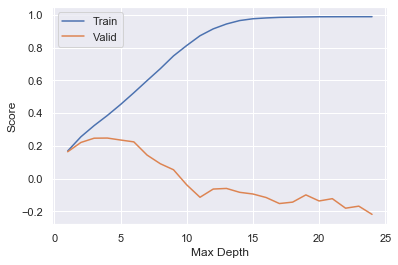

In [15]:
import matplotlib.pyplot as plt

train_score = []
valid_score = []
depth_range = range(1, 25)
for dept in depth_range:
    tree = DecisionTreeRegressor(max_depth = dept).fit(x_train, y_train)
    
    train_score.append(tree.score(x_train, y_train))
    valid_score.append(tree.score(x_valid, y_valid))
    
plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)

plt.legend(['Train', 'Valid'])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100)

In [17]:
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [18]:
print('training set accuracy :', forest.score(x_train, y_train))
print('valid set score', forest.score(x_valid, y_valid))

training set accuracy : 0.9089443205226819
valid set score 0.38676076115326796


In [19]:
y_predict = forest.predict(x_test)
print("test set accuracy :", forest.score(x_test, y_test))

comparison = pd.DataFrame(y_test)

comparison['prediction'] = y_predict
comparison.head(10)

test set accuracy : 0.2782439962994747


,quality,prediction
391,0.142240,0.079621
1375,-1.211981,-0.536332
525,-0.290332,-0.399870
1516,-1.138165,-0.125678
288,1.150382,0.450545
204,-0.106125,-0.649583
1445,0.967520,-0.254252
1486,-1.202061,-0.302924
932,0.444504,-0.173843
201,-0.533384,-0.596017


## 더 좋은 평가지표 고안하기

In [20]:
df['quality'] = round(df['quality'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df) # 반환값 -> ndarray
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)

scaled_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [22]:
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2)
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
892,1.022873,-0.434742,-0.210412,-0.453218,-0.116184,-0.561823,-0.865676,0.526474,-0.590348,-0.048089,-1.054113
1434,1.080326,0.068040,0.508495,9.124734,2.689307,3.741561,1.475814,3.680055,-0.849519,0.660068,-1.335715
51,-0.987984,-0.043689,-1.186070,-0.240375,-0.392483,-0.753085,-0.956903,-0.607756,0.575922,-0.166115,-0.960246
808,-0.528360,0.012176,-0.775267,-0.453218,1.647875,-1.135608,-1.048130,0.144864,-0.331177,1.191186,-1.147981
1387,-0.528360,0.626688,-1.032019,-0.524166,0.266383,-0.753085,-0.713631,-0.342749,-0.072005,-0.461180,-0.772512
...,...,...,...,...,...,...,...,...,...,...,...
961,-0.700719,0.179770,-0.672566,-0.666062,-0.201199,-0.848716,-0.865676,-0.438151,-0.266384,-0.225128,-1.054113
204,-0.758172,-0.546472,0.457144,-0.666062,0.032592,-0.179300,-0.287906,-0.316248,0.187166,-0.579207,-1.147981
376,1.827215,-0.434742,1.176051,0.327207,-0.201199,0.298854,0.016184,1.883309,-0.331177,2.666513,0.541630
1551,-0.700719,0.794282,-1.391472,-0.169427,-0.094931,0.203223,-0.591995,0.494673,0.835093,-0.697233,-0.960246


In [23]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

In [24]:
forest = RandomForestRegressor(n_estimators = 100)
forest.fit(x_train, y_train)

print('training set accuracy :', forest.score(x_train, y_train))
print('valid set score', tree.score(x_valid, y_valid))

training set accuracy : 0.9064112149080085
valid set score 0.33786748330377636


In [25]:
y_predict = tree.predict(x_test)
print("test set accuracy :", tree.score(x_test, y_test))

comparison = pd.DataFrame(y_test)

comparison['prediction'] = y_predict
comparison.head(10)

test set accuracy : 0.49442631656300556


,quality,prediction
24,0.335678,0.335678
1412,0.999999,0.999999
775,-1.183413,-1.183413
21,-1.049911,-1.049911
1079,1.848835,2.069153
709,-0.059976,-0.059976
406,0.246964,0.246964
1045,-0.123430,-0.123430
268,0.540572,0.540572
1135,0.537836,0.537836


In [26]:
evaluation = comparison['quality'] == comparison['prediction']
evaluation

24       True
1412     True
775      True
21       True
1079    False
        ...  
627     False
411      True
989      True
148      True
639      True
Length: 320, dtype: bool

In [27]:
success = (evaluation == True).sum()
fail = (evaluation == False).sum()

In [28]:
print(success / (success + fail))

0.5625
